In [130]:
import joblib
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import cv2
import os
from dog_class import CNN
from torchvision.transforms.functional import to_pil_image # 주어진 배열 또는 텐서를 PIL 이미지로 변환

In [131]:
# 이미지 전처리 시 사용
preprocessing = transforms.Compose(
    [transforms.Resize(size=(64, 64)), # 사이즈 조정 64 * 64
    transforms.ToTensor(), # 텐서로 변환
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))] # 정규화
)

In [132]:
model_path = 'model.pth'
mdl = CNN()

In [133]:
mdl = torch.load(model_path)
mdl.eval()

CNN(
  (conLayer): Conv2d(3, 25, kernel_size=(3, 3), stride=(1, 1))
  (conLayer2): Conv2d(25, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1960, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=250, bias=True)
  (fc4): Linear(in_features=250, out_features=125, bias=True)
  (fc5): Linear(in_features=125, out_features=60, bias=True)
  (fc6): Linear(in_features=60, out_features=2, bias=True)
)

In [134]:
# testPic_rgb = cv2.cvtColor(testPic, cv2.COLOR_BGR2RGB)
# testPic2_rgb = cv2.cvtColor(testPic2, cv2.COLOR_BGR2RGB)

(-0.5, 163.5, 180.5, -0.5)

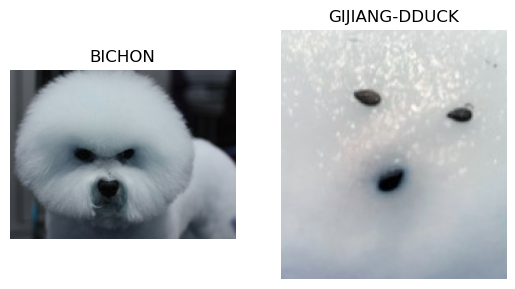

In [145]:
import matplotlib.pyplot as plt
testPic = cv2.imread('bichon2.jpg')
test_pil = to_pil_image(testPic)

testPic2 = cv2.imread('zangidduk2.jpg')
test_pil2 = to_pil_image(testPic2)

plt.subplot(1,2,1) 
plt.title('BICHON') 
plt.imshow(testPic)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('GIJIANG-DDUCK')
plt.imshow(testPic2)
plt.axis('off')

In [141]:
transformed_img = preprocessing(test_pil)
transformed_img = transformed_img.unsqueeze(0) # 배치 차원을 추가

transformed_img2 = preprocessing(test_pil2)
transformed_img2 = transformed_img2.unsqueeze(0)

def predict(trans_img) :
    with torch.no_grad() : # 그래디언트 업데이트 X
        output = mdl(trans_img) # 전처리된 이미지를 모델에 입력하여 출력을 계산
        _, predicted = torch.max(torch.softmax(output, dim=1).data, 1) # 모델의 출력에 소프트맥스 함수를 적용하여 확률값으로 변환
        print(f"{torch.softmax(output, dim=1).data[0][predicted].item():.2f}% 확률로 {'비숑' if predicted.item() else '기장떡'}입니다!")

In [144]:
predict(transformed_img2)

0.72% 확률로 기장떡입니다!
